In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

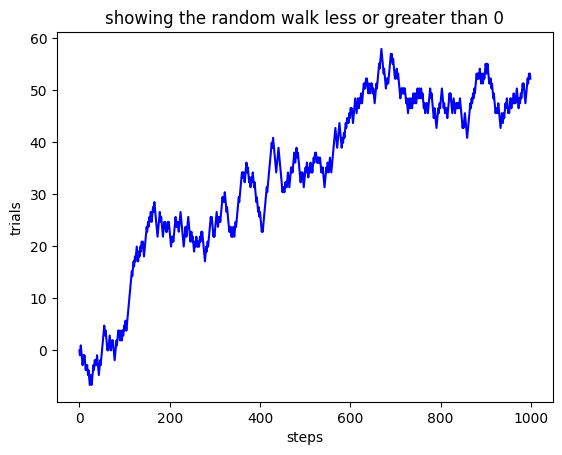

Plot window opened.
[ 0.   -0.95  0.    0.95  0.   -0.95 -1.9  -2.85 -1.9  -0.95 -1.9  -0.95
 -1.9  -2.85 -3.8  -2.85 -3.8  -2.85 -3.8  -4.75 -3.8  -4.75 -5.7  -6.65
 -5.7  -4.75 -5.7  -6.65 -5.7  -4.75 -3.8  -2.85 -3.8  -2.85 -1.9  -2.85
 -1.9  -2.85 -1.9  -0.95 -1.9  -2.85 -3.8  -4.75 -3.8  -2.85 -1.9  -2.85
 -1.9  -0.95  0.    0.95  1.9   2.85  3.8   4.75  3.8   2.85  3.8   2.85
  1.9   0.95  0.    0.95  0.    0.95  1.9   2.85  1.9   0.95  0.    0.95
  1.9   0.95  1.9   0.95  0.   -0.95 -1.9  -0.95  0.    0.95  1.9   0.95
  1.9   2.85  3.8   2.85  3.8   2.85  1.9   2.85  3.8   2.85  1.9   2.85
  3.8   2.85  3.8   4.75  3.8   4.75  5.7   4.75  3.8   4.75  5.7   6.65
  7.6   8.55  9.5  10.45 11.4  12.35 13.3  14.25 15.2  14.25 15.2  16.15
 17.1  16.15 17.1  18.05 17.1  18.05 19.   19.95 19.   18.05 17.1  18.05
 19.   18.05 19.   19.95 19.   19.95 20.9  19.95 20.9  19.95 19.   18.05
 19.   19.95 20.9  21.85 22.8  23.75 22.8  23.75 24.7  23.75 24.7  25.65
 24.7  25.65 26.6  25.65 24.7  

In [14]:
def random_walk(number_of_tries, center):
    yv = np.random.rand(number_of_tries)  # Create a 1D array of random numbers

    ver = np.zeros(number_of_tries) 
    ver[0] = current_position = center         # Python uses 0-based indexing

    for i in range(1, number_of_tries):
        if yv[i] < 0.5:
            current_position += 1  # Use += for in-place addition
        else:
            current_position -= 1  # Use -= for in-place subtraction
        
        ver[i] = 0.95 * current_position

    plt.plot(ver, color='blue') # Set color directly
    plt.title('showing the random walk less or greater than 0')
    plt.ylabel('trials') # This was the label in the original MATLAB
    plt.xlabel('steps')  # Added an x-label for clarity
    plt.show() # Display the plot

    return ver

if __name__ == '__main__':
    x = random_walk(1000, 0)
    print("Plot window opened.")
    print(x)

In [15]:
def trajectories_transform():
    """
    Converts trajectory CSV files.

    This function reads trajectory data from a set of CSV files,
    extracts the first 10 unique consecutive values, and saves
    this new 10-element array to a new directory.
    """
    
    # Outer loop from 1 to 10
    for i in range(1, 11):
        
        # Inner loop from 1 to 40
        for j in range(1, 41):
            
            # Use an f-string (equivalent to sprintf) to create file paths
            input_path = f'C:\\Users\\es25591\\Workspace\\CacheVideoPredict360\\Trajectories\\V{i}\\T{j}.csv'
            # Note: The original code had 'Trajectoriess' (double 's')
            output_path = f'C:\\Users\\es25591\\Workspace\\CacheVideoPredict360\\Trajectoriess\\V{i}\\T{j}.csv'

            try:
                # np.loadtxt is the Python equivalent of MATLAB's csvread
                trajectory = np.loadtxt(input_path, delimiter=',')
                
                # Ensure trajectory is at least 1D (if file has only one number)
                if trajectory.ndim == 0:
                    trajectory = trajectory.reshape(1)

                # Handle empty files
                if trajectory.size == 0:
                    print(f"Warning: {input_path} is empty, skipping.")
                    continue

                # --- Start of the transformation logic ---
                
                # Initialize a 10-element zero array
                # (MATLAB: tr=zeros(10,1))
                # This is placed *inside* the loop to process each file fresh.
                tr = np.zeros(10)

                # Set the first element (Python uses 0-based indexing)
                # (MATLAB: tr(1,1)=trajectory(1))
                tr[0] = trajectory[0]

                # Initialize index for the *next* slot (slot 1)
                # (MATLAB: ind=2)
                ind = 1

                # (MATLAB: if length(trajectory)>1)
                if trajectory.size > 1:
                    
                    # (MATLAB: for k=2:30)
                    # Loop from the 2nd element (index 1) up to the 30th (index 29)
                    # or the end of the array, whichever comes first.
                    for k in range(1, min(trajectory.size, 30)):
                        
                        # (MATLAB: if trajectory(k)~=tr(ind-1) && ind<=10)
                        # Check against the last-added element (tr[ind-1])
                        # and ensure we have space (ind < 10 for indices 0-9)
                        if trajectory[k] != tr[ind - 1] and ind < 10:
                            
                            # (MATLAB: tr(ind)=trajectory(k); ind=ind+1;)
                            tr[ind] = trajectory[k]
                            ind += 1

                    # --- Write the new trajectory file ---
                    
                    # Ensure the output directory exists
                    output_dir = os.path.dirname(output_path)
                    os.makedirs(output_dir, exist_ok=True)
                    
                    # np.savetxt is the Python equivalent of MATLAB's csvwrite
                    np.savetxt(output_path, tr, delimiter=',')

            except FileNotFoundError:
                print(f"Warning: File not found {input_path}, skipping.")
            except Exception as e:
                print(f"Error processing file {input_path}: {e}")

# --- To run the function ---
if __name__ == "__main__":
    trajectories_transform()
    print("Trajectory transformation complete.")

Trajectory transformation complete.


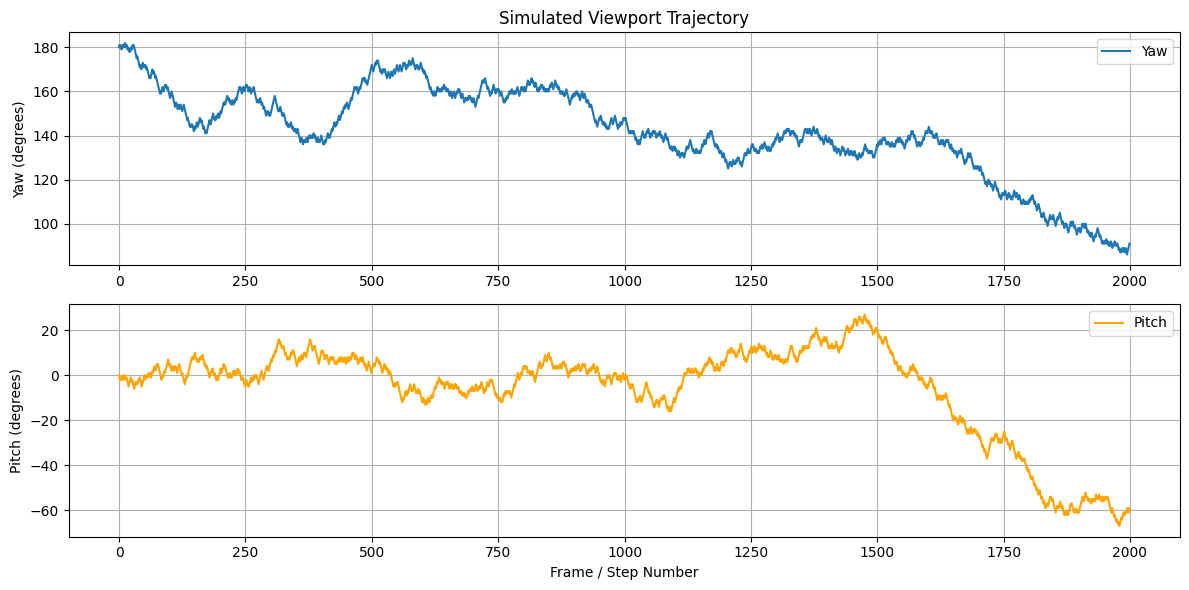

In [16]:
def simulate_viewport_walk(num_steps, start_yaw=0, start_pitch=0):
    """
    - Yaw (horizontal) wraps around (0-360).
    - Pitch (vertical) clamps (-90 to +90).
    """
    
    yaw_trajectory = np.zeros(num_steps)
    pitch_trajectory = np.zeros(num_steps)
    
    # Set starting position
    current_yaw = start_yaw
    current_pitch = start_pitch
    yaw_trajectory[0] = current_yaw
    pitch_trajectory[0] = current_pitch
    
    # Create random "decisions" for both axes
    # -1 = left/down, +1 = right/up
    yaw_steps = np.random.choice([-1, 1], size=num_steps)
    pitch_steps = np.random.choice([-1, 1], size=num_steps)

    # Loop for each step (or video frame)
    for i in range(1, num_steps):
        current_yaw = (current_yaw + yaw_steps[i]) % 360 # 1. Update Yaw (Horizontal)
        
        # 2. Update Pitch (Vertical)
        # Use np.clip() to clamp between -90 and +90
        current_pitch = np.clip(current_pitch + pitch_steps[i], -90, 90)
        
        # Store the new position
        yaw_trajectory[i] = current_yaw
        pitch_trajectory[i] = current_pitch
        
    return yaw_trajectory, pitch_trajectory

# --- Example Usage ---
if __name__ == '__main__':
    steps = 2000  # e.g., 2000 frames
    yaw, pitch = simulate_viewport_walk(steps, start_yaw=180)

    # Plot the results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(yaw, label='Yaw')
    plt.title('Simulated Viewport Trajectory')
    plt.ylabel('Yaw (degrees)')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(pitch, label='Pitch', color='orange')
    plt.ylabel('Pitch (degrees)')
    plt.xlabel('Frame / Step Number')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

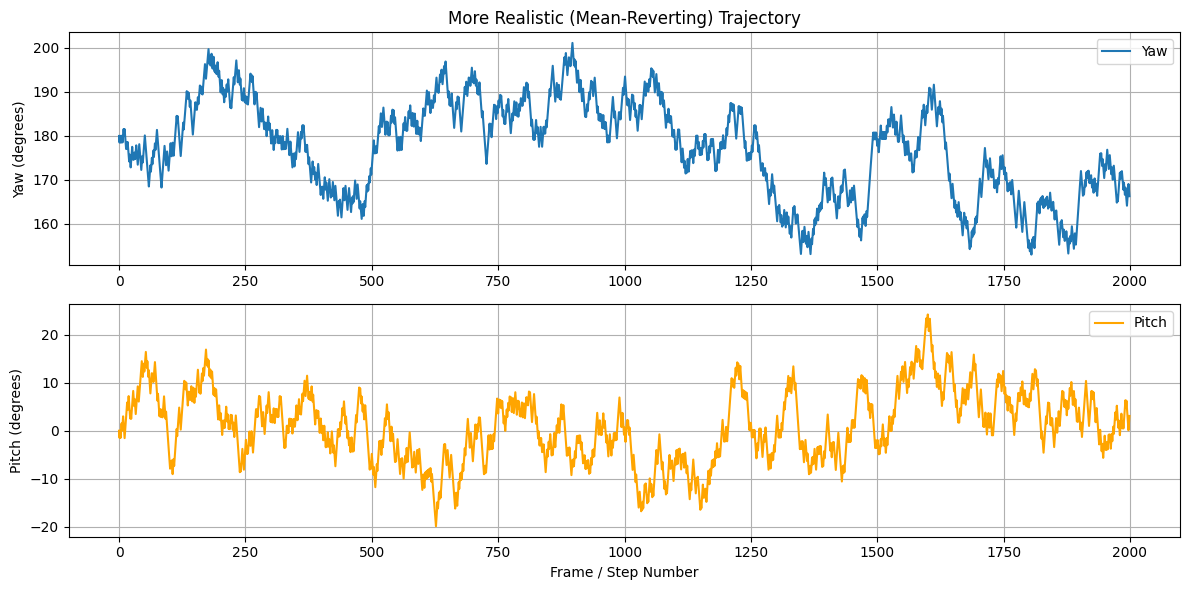

In [17]:
def simulate_realistic_viewport(num_steps, damping=0.99, step_size=1, start_yaw=0):
    """
    Simulates a more realistic viewport using a mean-reverting
    random walk (Ornstein-Uhlenbeck process).
    
    'damping' pulls the gaze back to the center (0 or 180).
    """
    yaw_trajectory = np.zeros(num_steps)
    pitch_trajectory = np.zeros(num_steps)
    
    current_yaw_drift = 0
    current_pitch_drift = 0
    
    yaw_trajectory[0] = start_yaw
    pitch_trajectory[0] = 0

    for i in range(1, num_steps):
        # Get random steps
        yaw_step = np.random.choice([-step_size, step_size])
        pitch_step = np.random.choice([-step_size, step_size])
        
        # Apply the mean-reverting logic
        # new_position = (old_position * damping) + random_step
        current_yaw_drift = (current_yaw_drift * damping) + yaw_step
        current_pitch_drift = (current_pitch_drift * damping) + pitch_step
        
        # Yaw: Add to start and wrap
        yaw_trajectory[i] = (start_yaw + current_yaw_drift) % 360
        
        # Pitch: Clamp
        pitch_trajectory[i] = np.clip(current_pitch_drift, -90, 90)
        
    return yaw_trajectory, pitch_trajectory

if __name__ == '__main__':
    steps = 2000
    # A damping of 0.99 means it reverts slowly.
    # A damping of 0.90 would revert very quickly.
    yaw, pitch = simulate_realistic_viewport(steps, damping=0.99, step_size=1.5, start_yaw=180)

    # (Plotting code is the same as the previous example)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(yaw, label='Yaw')
    plt.title('More Realistic (Mean-Reverting) Trajectory')
    plt.ylabel('Yaw (degrees)')
    plt.grid(True)
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(pitch, label='Pitch', color='orange')
    plt.ylabel('Pitch (degrees)')
    plt.xlabel('Frame / Step Number')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [18]:
def get_required_tiles(center_yaw, center_pitch, n=12, fov_yaw=90.0, fov_pitch=90.0):
    """
    Given a center yaw and pitch, compute the required tiles.

    Parameters:
    - center_yaw: Center yaw angle in degrees (0-360).
    - center_pitch: Center pitch angle in degrees (-90 to +90).
    - n: Number of tiles per axis (e.g., 8x8 grid).
    - fov_yaw: Field of view in yaw direction in degrees.
    - fov_pitch: Field of view in pitch direction in degrees.

    Returns:
    - A list of (tile_x, tile_y) tuples representing required tiles.
    """
    tile_size_yaw = 360 / n
    tile_size_pitch = 180 / n  # Pitch ranges from -90 to +90

    # Calculate the FOV boundaries
    half_fov_yaw = fov_yaw / 2
    half_fov_pitch = fov_pitch / 2

    # Determine the min and max yaw and pitch
    min_yaw = (center_yaw - half_fov_yaw) % 360
    max_yaw = (center_yaw + half_fov_yaw) % 360
    min_pitch = max(center_pitch - half_fov_pitch, -90)
    max_pitch = min(center_pitch + half_fov_pitch, 90)

    required_tiles = set()

    # Calculate tile indices for yaw
    if min_yaw < max_yaw:
        yaw_indices = range(int(min_yaw // tile_size_yaw), int(max_yaw // tile_size_yaw) + 1)
    else:
        yaw_indices = list(range(int(min_yaw // tile_size_yaw), n)) + list(range(0, int(max_yaw // tile_size_yaw) + 1))

    # Calculate tile indices for pitch
    pitch_indices = range(int((min_pitch + 90) // tile_size_pitch), int((max_pitch + 90) // tile_size_pitch) + 1)

    # Combine yaw and pitch indices to get required tiles
    for yaw_index in yaw_indices:
        for pitch_index in pitch_indices:
            required_tiles.add((yaw_index % n, pitch_index))

    return list(required_tiles)

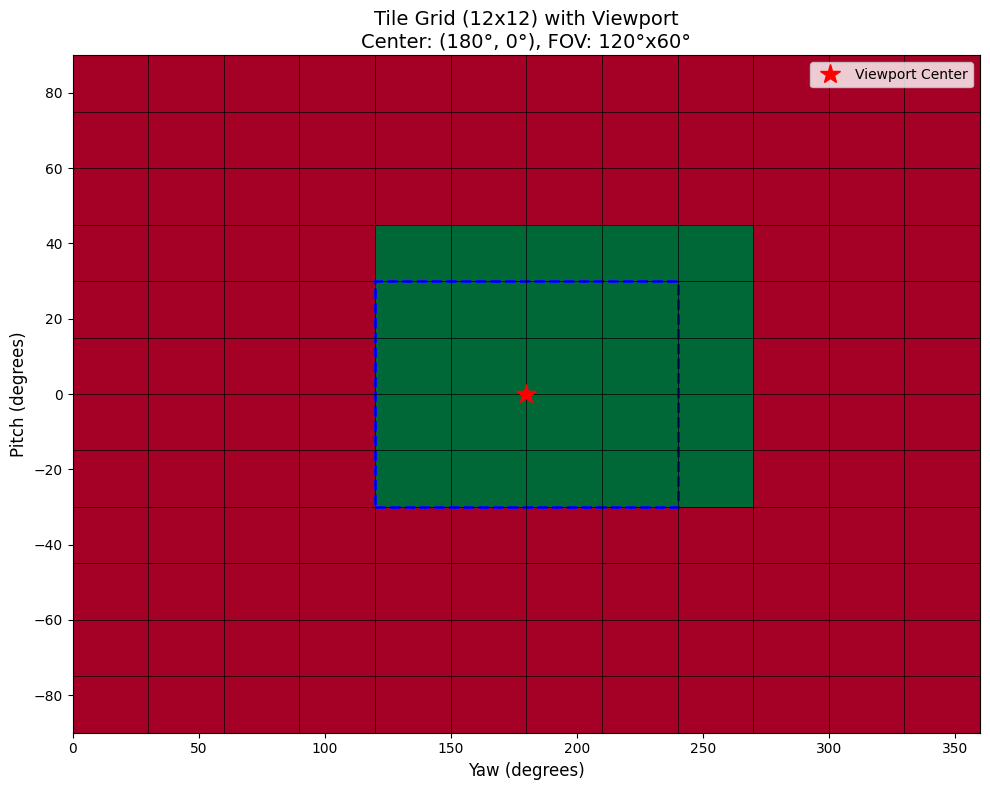

Required tiles for viewport at (180°, 0°):
Total tiles: 25
Tile indices (x, y): [(4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]


In [19]:
def visualize_tiles_and_viewport(center_yaw, center_pitch, n=12, fov_yaw=90.0, fov_pitch=90.0):
    # Get the required tiles for the viewport
    required_tiles = get_required_tiles(center_yaw, center_pitch, n, fov_yaw, fov_pitch)
    
    # Create a grid to represent the tiles
    tile_grid = np.zeros((n, n))
    
    # Mark the required tiles with 1 (with bounds checking)
    for tile_x, tile_y in required_tiles:
        # Ensure indices are within bounds [0, n-1]
        if 0 <= tile_x < n and 0 <= tile_y < n:
            tile_grid[tile_y, tile_x] = 1
        else:
            print(f"Warning: Tile ({tile_x}, {tile_y}) is out of bounds for {n}x{n} grid")
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Display the grid
    ax.imshow(tile_grid, cmap='RdYlGn', interpolation='nearest', origin='lower', 
              extent=[0, 360, -90, 90], aspect='auto')
    
    # Draw grid lines for tiles
    tile_size_yaw = 360 / n
    tile_size_pitch = 180 / n
    
    for i in range(n + 1):
        ax.axvline(i * tile_size_yaw, color='black', linewidth=0.5)
        ax.axhline(-90 + i * tile_size_pitch, color='black', linewidth=0.5)
    
    # Draw the viewport FOV rectangle
    half_fov_yaw = fov_yaw / 2
    half_fov_pitch = fov_pitch / 2
    
    # Calculate viewport boundaries
    min_yaw = center_yaw - half_fov_yaw
    max_yaw = center_yaw + half_fov_yaw
    min_pitch = max(center_pitch - half_fov_pitch, -90)
    max_pitch = min(center_pitch + half_fov_pitch, 90)
    
    # Handle wrapping for yaw
    if min_yaw < 0 or max_yaw > 360:
        # Draw two rectangles if wrapping occurs
        if min_yaw < 0:
            ax.add_patch(plt.Rectangle(
                (min_yaw + 360, min_pitch), 
                -min_yaw, 
                max_pitch - min_pitch,
                fill=False, 
                edgecolor='blue', 
                linewidth=2, 
                linestyle='--'
            ))
            ax.add_patch(plt.Rectangle(
                (0, min_pitch), 
                max_yaw, 
                max_pitch - min_pitch,
                fill=False, 
                edgecolor='blue', 
                linewidth=2, 
                linestyle='--'
            ))
        else:
            ax.add_patch(plt.Rectangle(
                (min_yaw, min_pitch), 360 - min_yaw, max_pitch - min_pitch,
                fill=False, 
                edgecolor='blue', 
                linewidth=2, 
                linestyle='--'
            ))
            ax.add_patch(plt.Rectangle(
                (0, min_pitch), 
                max_yaw - 360, 
                max_pitch - min_pitch,
                fill=False, 
                edgecolor='blue', 
                linewidth=2, 
                linestyle='--'
            ))
    else:
        ax.add_patch(plt.Rectangle(
            (min_yaw, min_pitch), 
            fov_yaw, 
            max_pitch - min_pitch,
            fill=False, 
            edgecolor='blue', 
            linewidth=2, 
            linestyle='--'
        ))
    
    # Mark the center point
    ax.plot(center_yaw, center_pitch, 'r*', markersize=15, label='Viewport Center')
    
    # Set labels and title
    ax.set_xlabel('Yaw (degrees)', fontsize=12)
    ax.set_ylabel('Pitch (degrees)', fontsize=12)
    ax.set_title(f'Tile Grid ({n}x{n}) with Viewport\nCenter: ({center_yaw}°, {center_pitch}°), FOV: {fov_yaw}°x{fov_pitch}°', 
                 fontsize=14)
    ax.set_xlim(0, 360)
    ax.set_ylim(-90, 90)
    ax.legend()
    ax.grid(False)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Required tiles for viewport at ({center_yaw}°, {center_pitch}°):")
    print(f"Total tiles: {len(required_tiles)}")
    print(f"Tile indices (x, y): {sorted(required_tiles)}")

if __name__ == '__main__':
    # Visualize example 1: centered viewport
    visualize_tiles_and_viewport(180, 0, n=12, fov_yaw=120, fov_pitch=60)

    # # Visualize example 2: viewport with wrapping
    # visualize_tiles_and_viewport(10, 0, n=12, fov_yaw=120, fov_pitch=60)

    # # Visualize example 3: viewport at the edge (pitch)
    # visualize_tiles_and_viewport(180, 60, n=12, fov_yaw=120, fov_pitch=60)


Simulating viewport trajectory with tile tracking...

Simulation complete!
Total frames: 2000
Tile grid: 4x4 = 16 total tiles
Max tiles required in any frame: 6

Tile statistics:
  Min tiles per frame: 4
  Max tiles per frame: 6
  Avg tiles per frame: 4.29

First 10 frames - required tiles (as linear indices):
  Frame   0: yaw=180.00°, pitch=  0.00° → tiles: [ 5  9  6 10]
  Frame   1: yaw=178.50°, pitch=  1.50° → tiles: [ 5  9  6 10]
  Frame   2: yaw=180.01°, pitch= -0.02° → tiles: [ 5  9  6 10]
  Frame   3: yaw=181.51°, pitch=  1.49° → tiles: [ 5  9  6 10]
  Frame   4: yaw=180.00°, pitch= -0.03° → tiles: [ 5  9  6 10]
  Frame   5: yaw=181.50°, pitch=  1.47° → tiles: [ 5  9  6 10]
  Frame   6: yaw=179.98°, pitch=  2.96° → tiles: [ 5  9  6 10]
  Frame   7: yaw=181.48°, pitch=  1.43° → tiles: [ 5  9  6 10]
  Frame   8: yaw=179.97°, pitch= -0.09° → tiles: [ 5  9  6 10]
  Frame   9: yaw=178.47°, pitch= -1.59° → tiles: [ 5  9  6 10]

Unique tiles accessed: 8 out of 16
Coverage: 50.0%


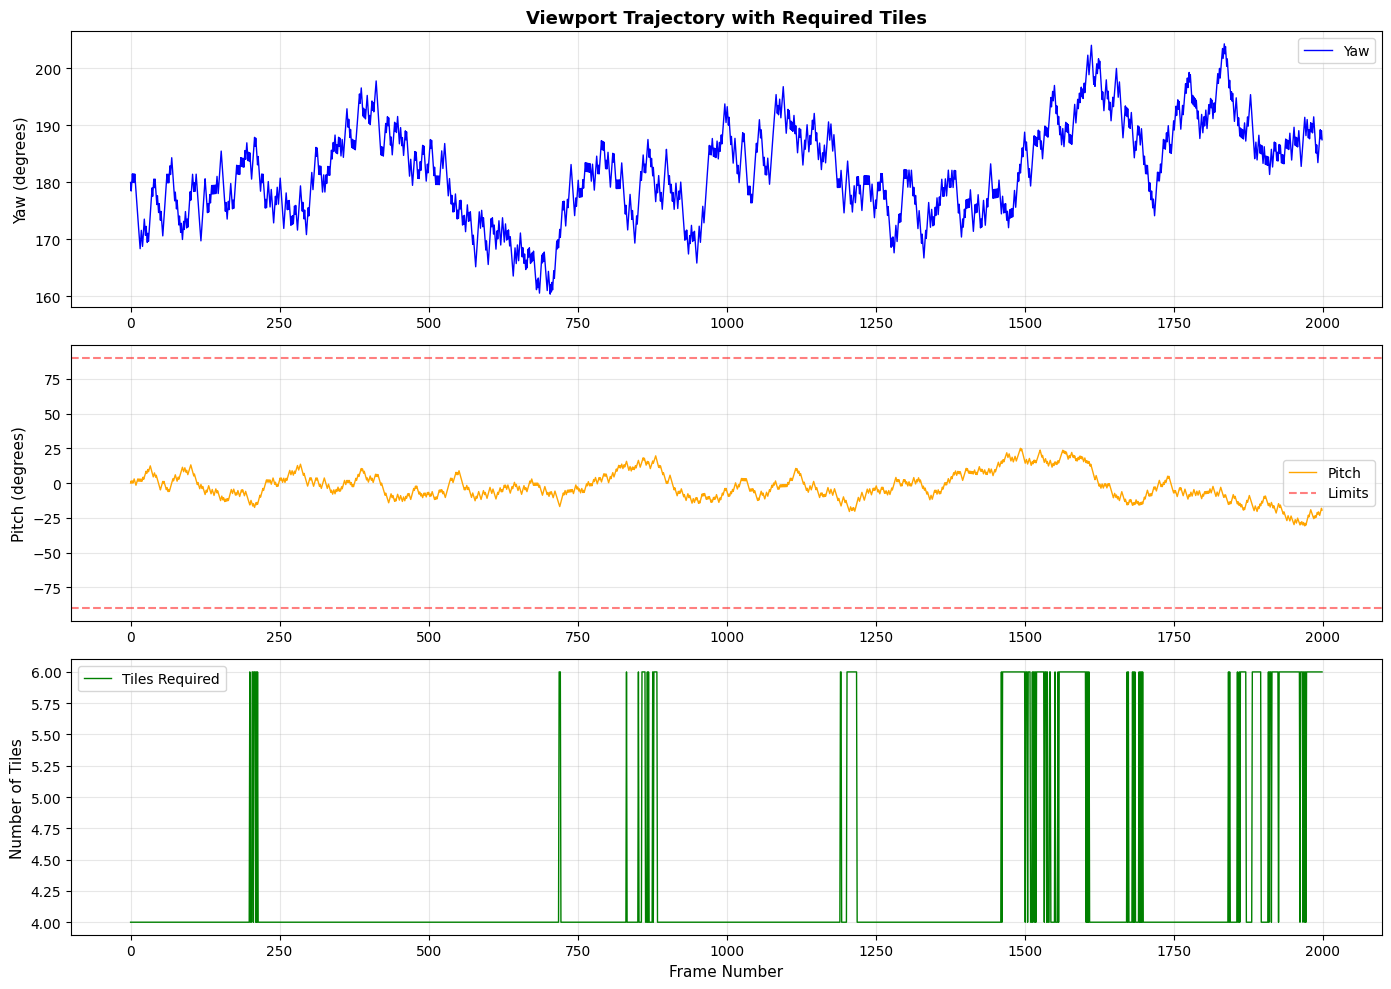


✓ Trajectory simulation complete with tile tracking!
  - yaw_trajectory shape: (2000,)
  - pitch_trajectory shape: (2000,)
  - tiles_array shape: (2000, 6)


In [20]:
def simulate_viewport_with_tiles(num_steps, n=8, fov_yaw=90.0, fov_pitch=90.0, 
                                 damping=0.99, step_size=1.5, start_yaw=180, start_pitch=0):
    """
    Simulates a realistic viewport trajectory and tracks required tiles at each step.
    
    Parameters:
    - num_steps: Number of simulation steps (frames)
    - n: Grid size (e.g., 8 for 8x8 tiles)
    - fov_yaw: Field of view in yaw (degrees)
    - fov_pitch: Field of view in pitch (degrees)
    - damping: Mean-reverting factor (0.99 = slow reversion)
    - step_size: Size of random steps
    - start_yaw: Starting yaw angle
    - start_pitch: Starting pitch angle
    
    Returns:
    - yaw_trajectory: Array of yaw positions
    - pitch_trajectory: Array of pitch positions
    - tiles_per_frame: List of sets, each containing required tile indices at that frame
    - tiles_array: 2D array (num_steps x max_tiles) with tile indices (-1 for unused slots)
    """
    
    # Initialize trajectories
    yaw_trajectory = np.zeros(num_steps)
    pitch_trajectory = np.zeros(num_steps)
    
    # Mean-reverting drift values
    current_yaw_drift = 0
    current_pitch_drift = 0
    
    # Set starting position
    yaw_trajectory[0] = start_yaw
    pitch_trajectory[0] = start_pitch
    
    # Store required tiles for each frame
    tiles_per_frame = []
    
    # Get initial tiles
    initial_tiles = get_required_tiles(start_yaw, start_pitch, n, fov_yaw, fov_pitch)
    tiles_per_frame.append(set(initial_tiles))
    
    # Simulate trajectory
    for i in range(1, num_steps):
        # Random steps
        yaw_step = np.random.choice([-step_size, step_size])
        pitch_step = np.random.choice([-step_size, step_size])
        
        # Apply mean-reverting logic
        current_yaw_drift = (current_yaw_drift * damping) + yaw_step
        current_pitch_drift = (current_pitch_drift * damping) + pitch_step
        
        # Update positions
        yaw_trajectory[i] = (start_yaw + current_yaw_drift) % 360
        pitch_trajectory[i] = np.clip(current_pitch_drift, -90, 90)
        
        # Get required tiles for this viewport position
        required_tiles = get_required_tiles(yaw_trajectory[i], pitch_trajectory[i], n, fov_yaw, fov_pitch)
        tiles_per_frame.append(set(required_tiles))
    
    # Convert to 2D array format (for easier processing)
    # Find max number of tiles needed at any frame
    max_tiles = max(len(tiles) for tiles in tiles_per_frame)
    
    # Create 2D array: rows=frames, cols=tile indices
    # Use -1 to indicate unused slots
    tiles_array = np.full((num_steps, max_tiles), -1, dtype=int)
    
    for frame_idx, tiles_set in enumerate(tiles_per_frame):
        tiles_list = sorted(list(tiles_set))
        for tile_idx, tile in enumerate(tiles_list):
            # Store as linear index: tile_y * n + tile_x
            tiles_array[frame_idx, tile_idx] = tile[1] * n + tile[0]
    
    return yaw_trajectory, pitch_trajectory, tiles_per_frame, tiles_array


# ========================================
# Example: Run simulation and analyze tiles
# ========================================
if __name__ == '__main__':
    num_frames = 2000
    n_tiles = 4

    print("Simulating viewport trajectory with tile tracking...")
    yaw, pitch, tiles_per_frame, tiles_array = simulate_viewport_with_tiles(
        num_steps=num_frames,
        n=n_tiles,
        fov_yaw=120,
        fov_pitch=60,
        damping=0.99,
        step_size=1.5,
        start_yaw=180,
        start_pitch=0
    )

    print(f"\nSimulation complete!")
    print(f"Total frames: {num_frames}")
    print(f"Tile grid: {n_tiles}x{n_tiles} = {n_tiles**2} total tiles")
    print(f"Max tiles required in any frame: {tiles_array.shape[1]}")

    # Statistics
    tiles_per_frame_counts = [len(tiles) for tiles in tiles_per_frame]
    print(f"\nTile statistics:")
    print(f"  Min tiles per frame: {min(tiles_per_frame_counts)}")
    print(f"  Max tiles per frame: {max(tiles_per_frame_counts)}")
    print(f"  Avg tiles per frame: {np.mean(tiles_per_frame_counts):.2f}")

    # Show first 10 frames
    print(f"\nFirst 10 frames - required tiles (as linear indices):")
    for i in range(min(10, num_frames)):
        tiles_in_frame = tiles_array[i][tiles_array[i] != -1]
        print(f"  Frame {i:3d}: yaw={yaw[i]:6.2f}°, pitch={pitch[i]:6.2f}° → tiles: {tiles_in_frame}")

    # Count unique tiles accessed throughout entire trajectory
    all_tiles_accessed = set()
    for tiles_set in tiles_per_frame:
        for tile in tiles_set:
            all_tiles_accessed.add(tile[1] * n_tiles + tile[0])

    print(f"\nUnique tiles accessed: {len(all_tiles_accessed)} out of {n_tiles**2}")
    print(f"Coverage: {len(all_tiles_accessed) / (n_tiles**2) * 100:.1f}%")

    # Plot the trajectory with tile count overlay
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))

    # Yaw trajectory
    axes[0].plot(yaw, label='Yaw', color='blue', linewidth=1)
    axes[0].set_ylabel('Yaw (degrees)', fontsize=11)
    axes[0].set_title('Viewport Trajectory with Required Tiles', fontsize=13, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()

    # Pitch trajectory
    axes[1].plot(pitch, label='Pitch', color='orange', linewidth=1)
    axes[1].set_ylabel('Pitch (degrees)', fontsize=11)
    axes[1].axhline(y=90, color='red', linestyle='--', alpha=0.5, label='Limits')
    axes[1].axhline(y=-90, color='red', linestyle='--', alpha=0.5)
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()

    # Number of tiles required per frame
    axes[2].plot(tiles_per_frame_counts, label='Tiles Required', color='green', linewidth=1)
    axes[2].set_ylabel('Number of Tiles', fontsize=11)
    axes[2].set_xlabel('Frame Number', fontsize=11)
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()

    plt.tight_layout()
    plt.show()

    print("\n✓ Trajectory simulation complete with tile tracking!")
    print(f"  - yaw_trajectory shape: {yaw.shape}")
    print(f"  - pitch_trajectory shape: {pitch.shape}")
    print(f"  - tiles_array shape: {tiles_array.shape}")


Visualizing trajectory sequence...


Frames 950-1009 (60 frames):


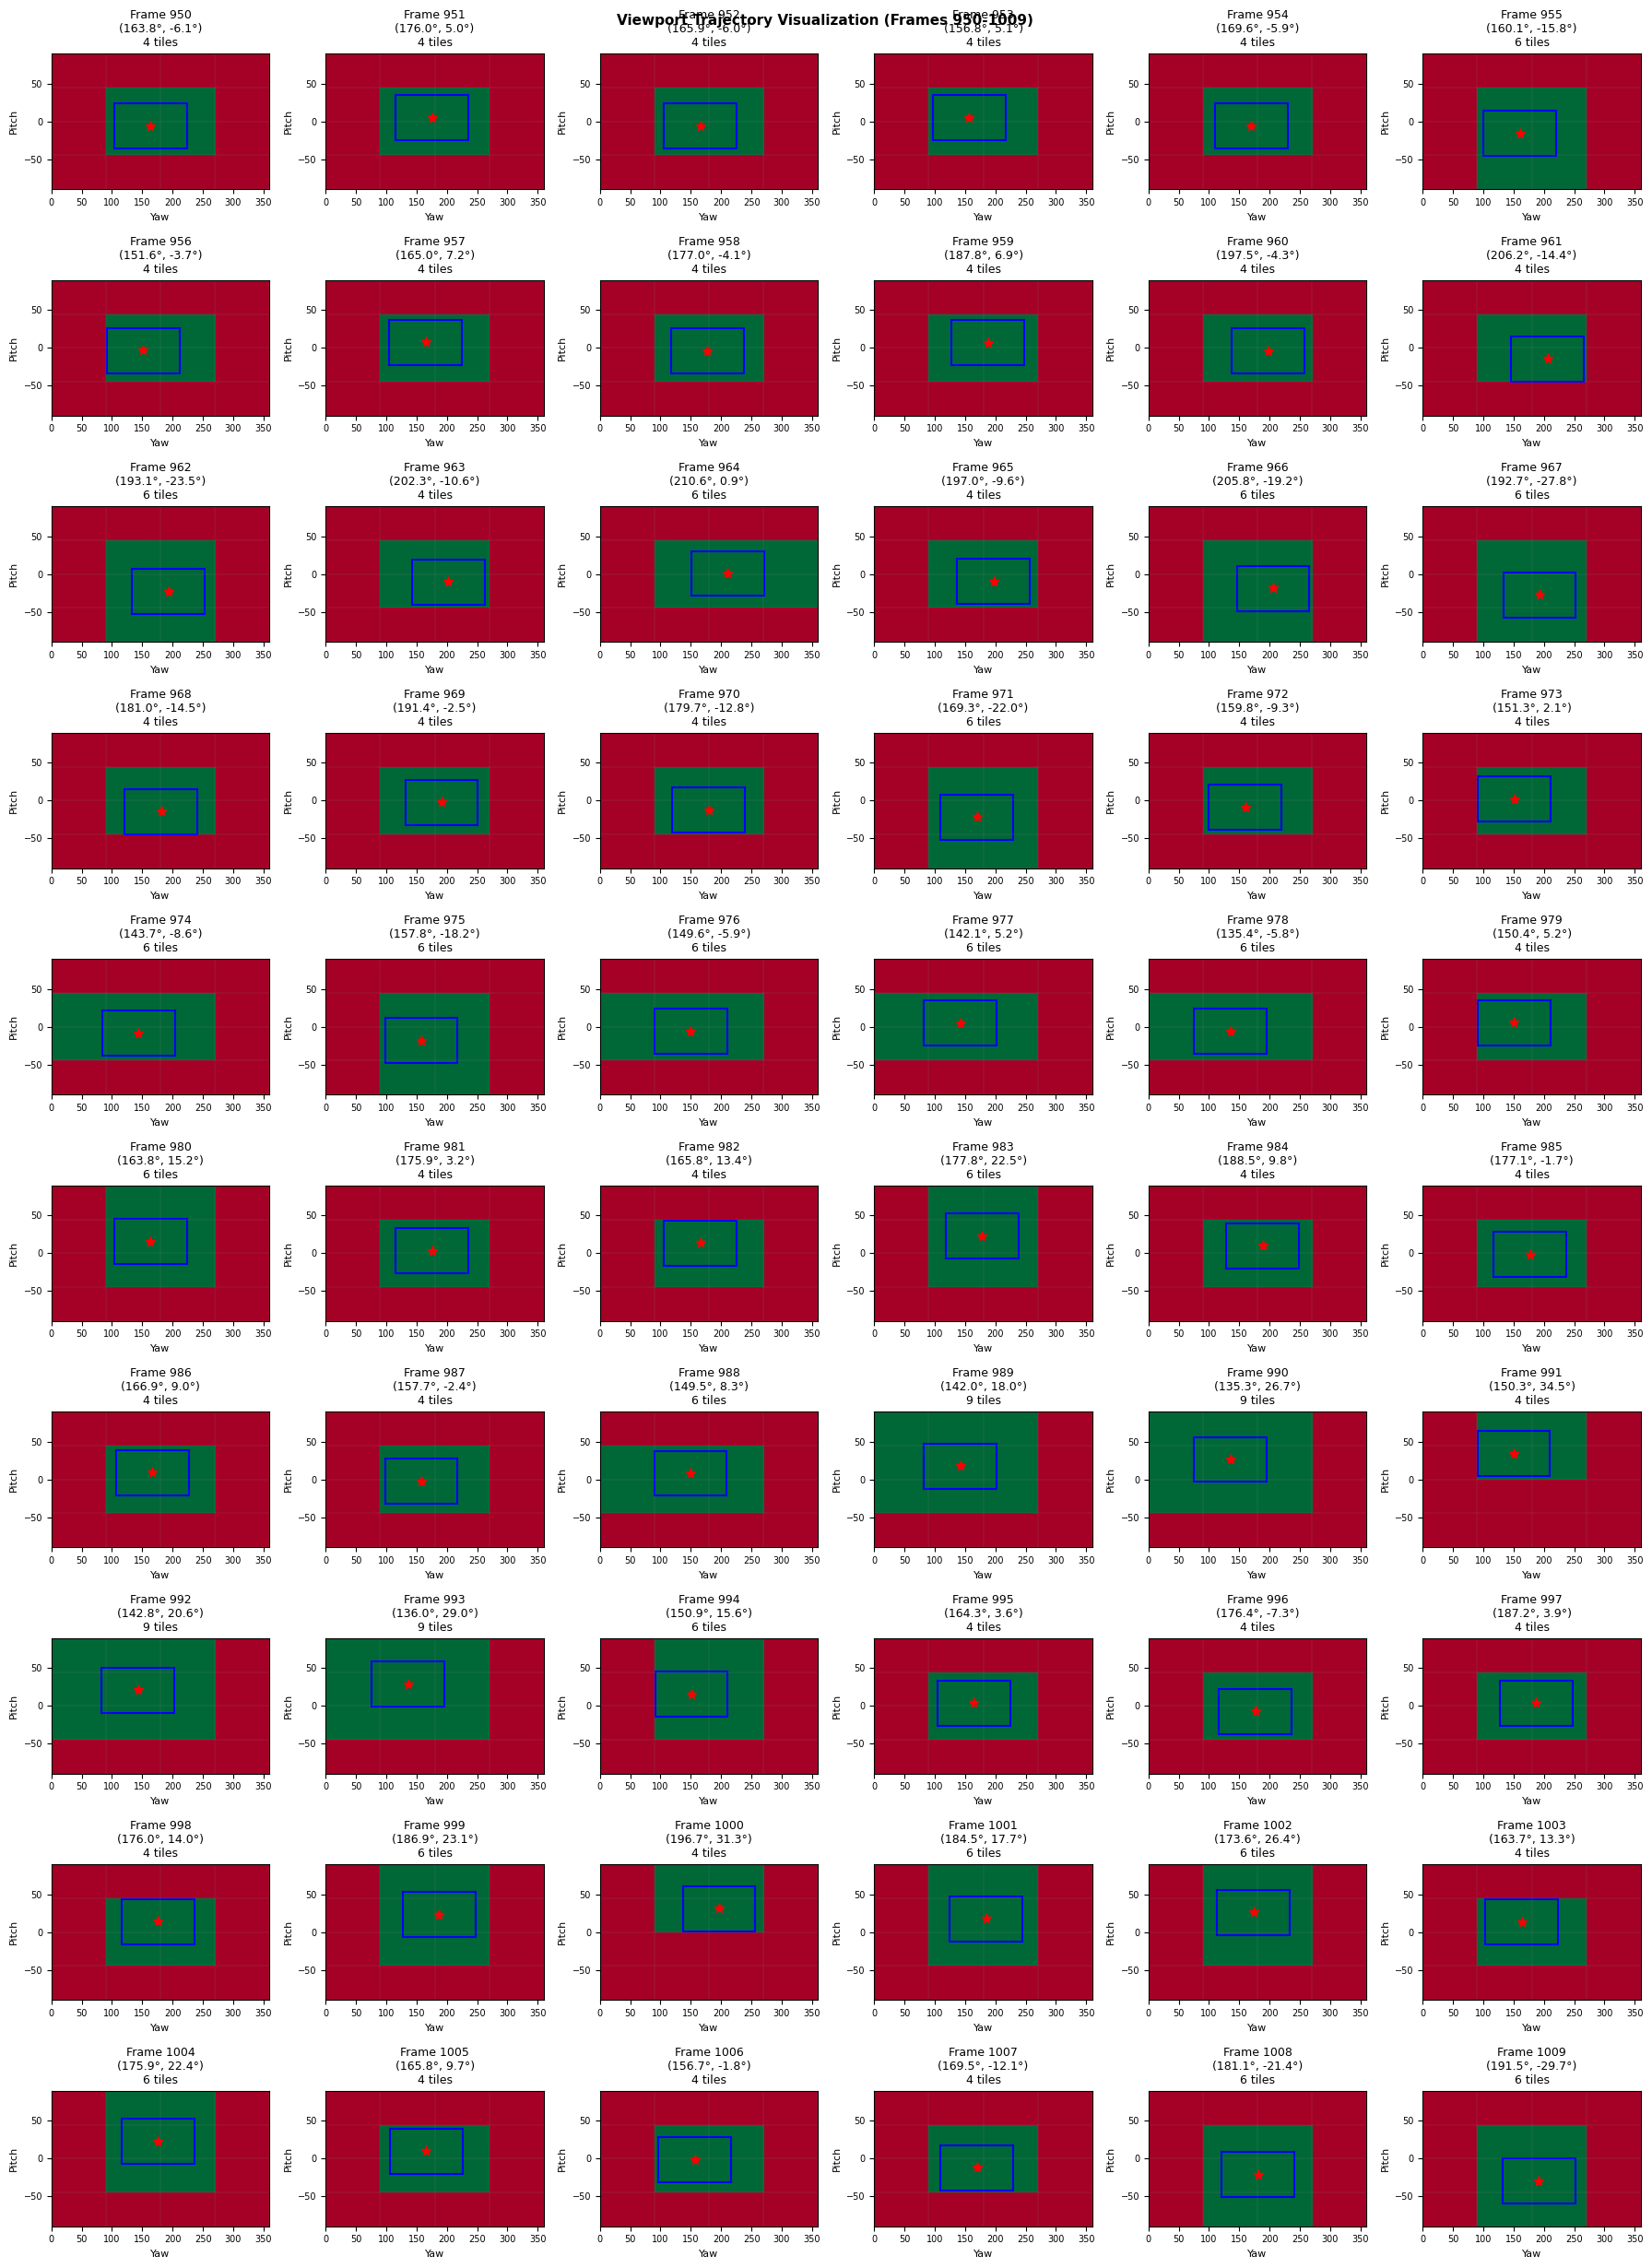


Frames 1400-1459 (60 frames):


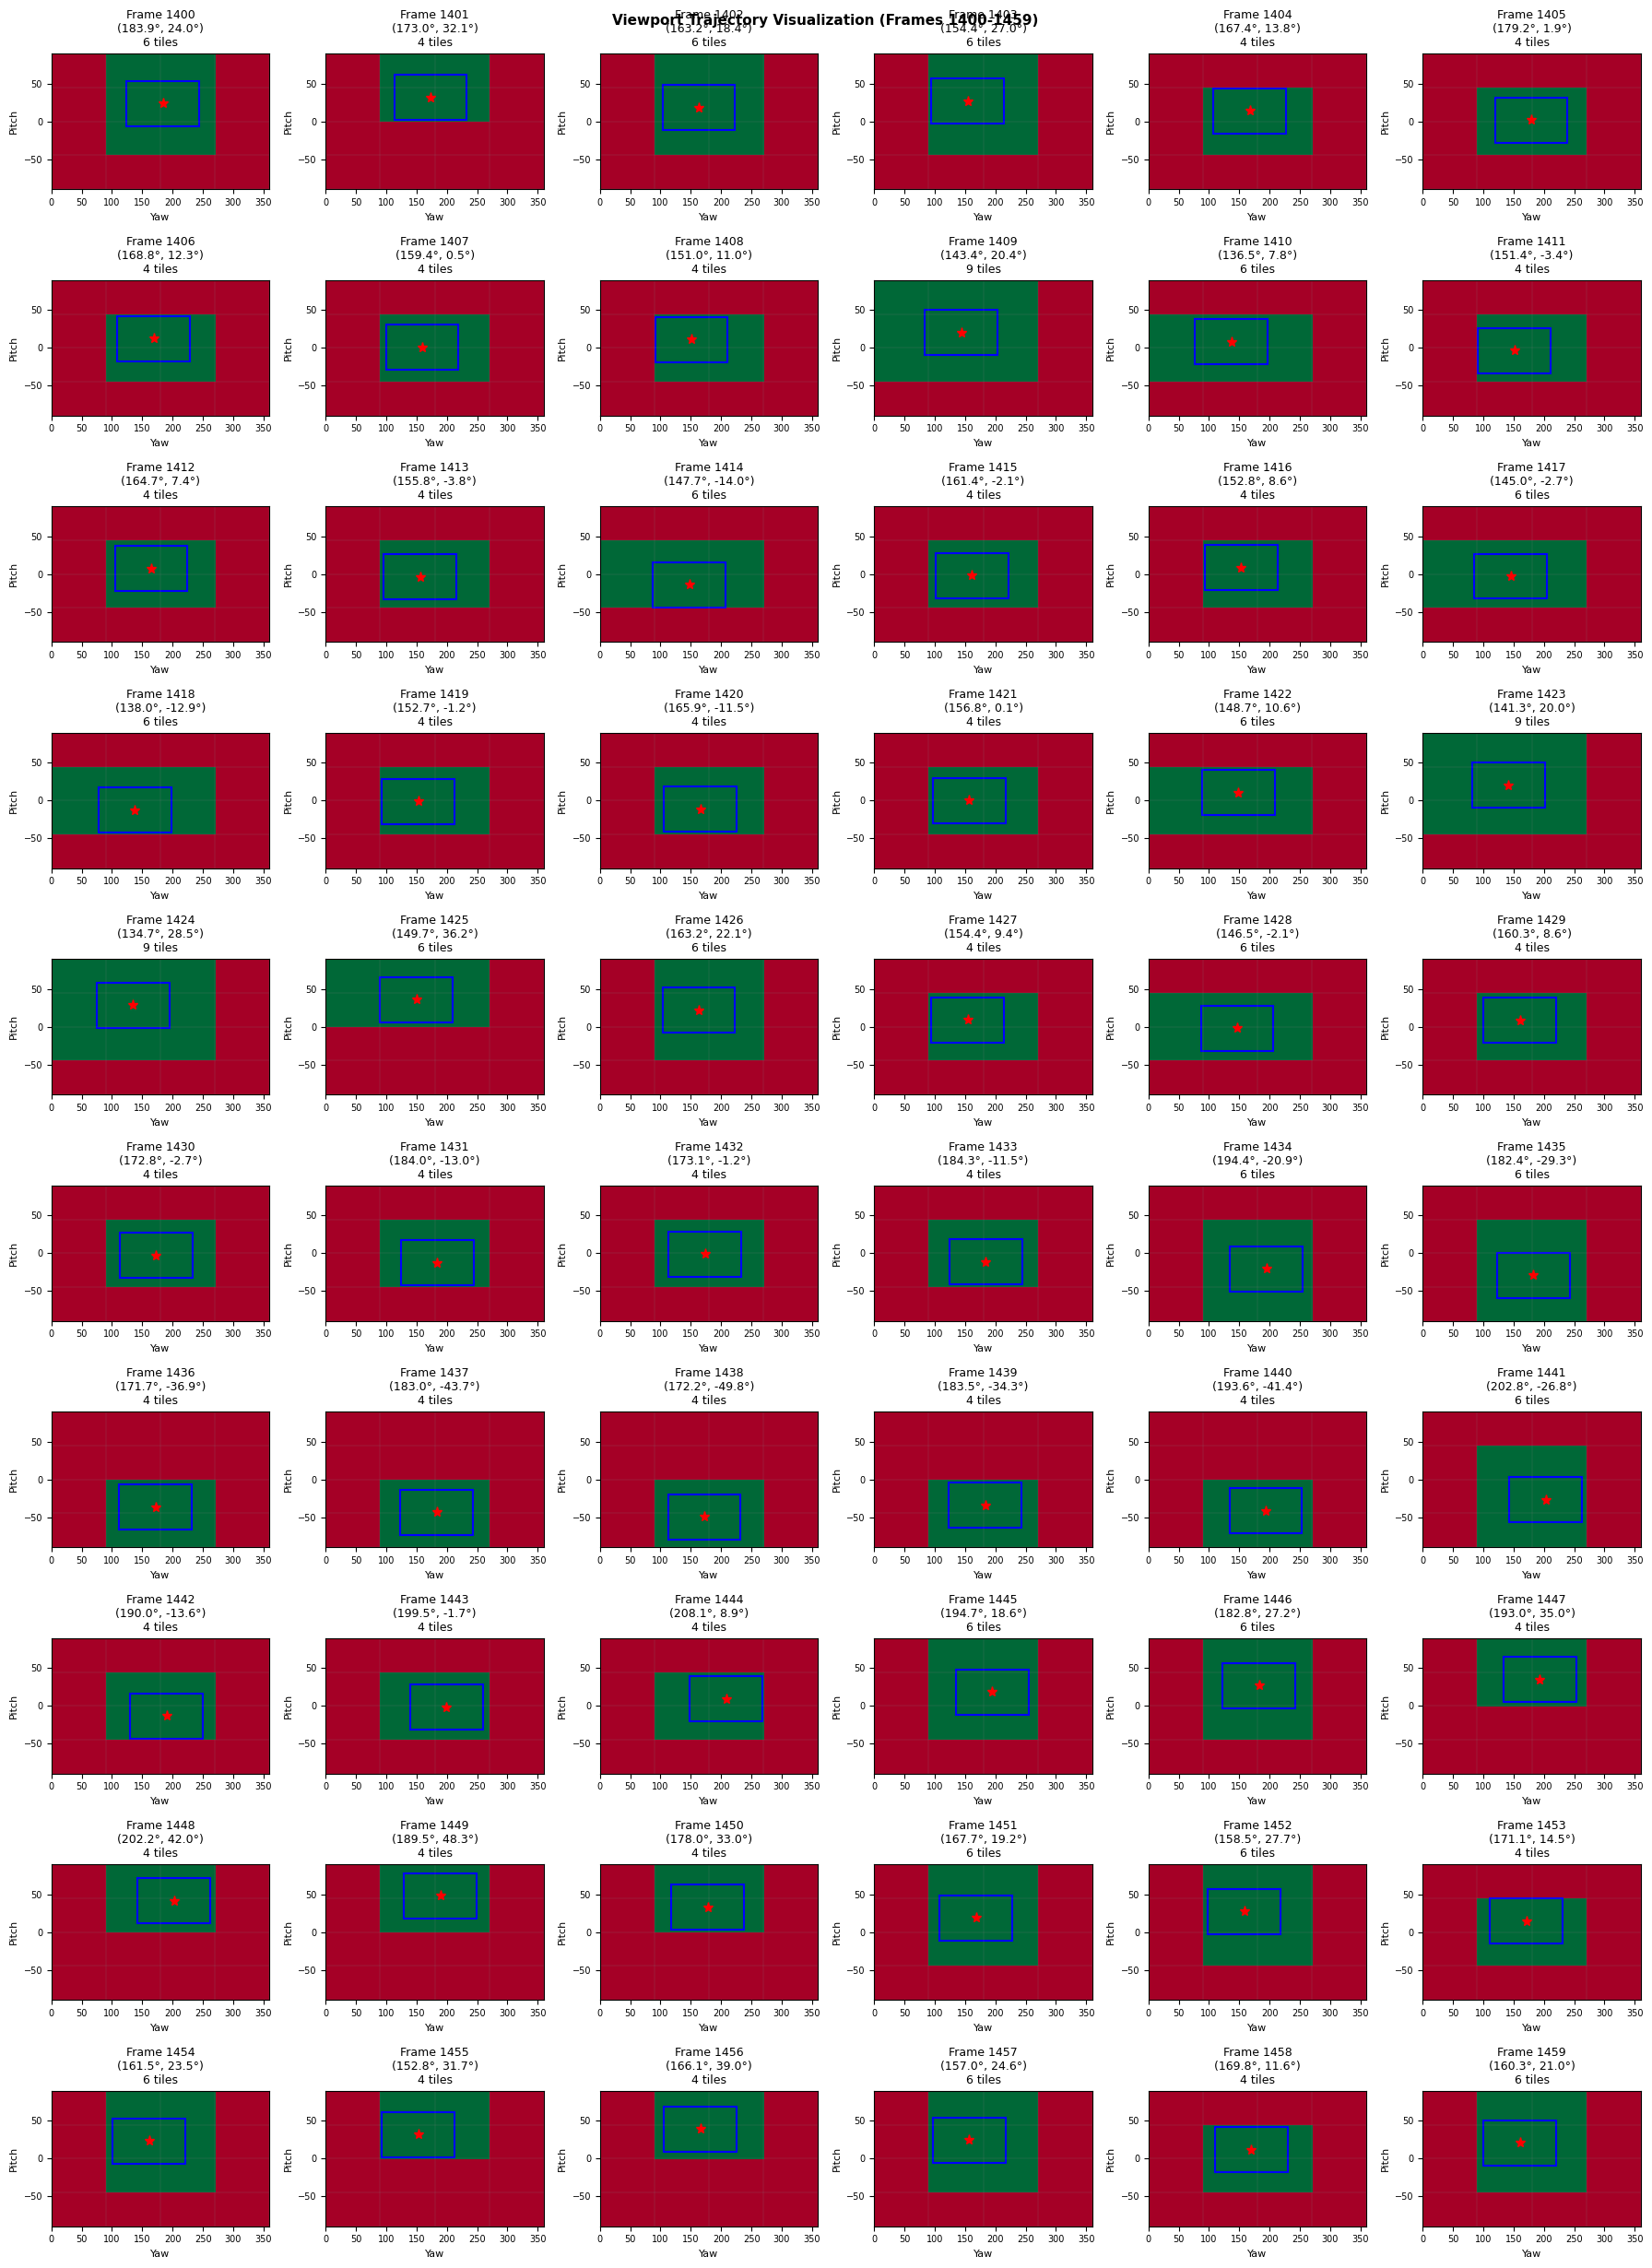

In [ ]:
def visualize_trajectory_sequence(
    yaw, 
    pitch, 
    tiles_per_frame, 
    n=8, 
    fov_yaw=90, 
    fov_pitch=90,
    start_frame=0, 
    num_frames_to_show=6, 
    cols=3
):
    """
    Visualizes a sequence of frames from the trajectory showing viewport and required tiles.
    
    Parameters:
    - yaw: Array of yaw positions
    - pitch: Array of pitch positions
    - tiles_per_frame: List of sets containing required tiles
    - n: Grid size (8x8)
    - fov_yaw, fov_pitch: Field of view
    - start_frame: Which frame to start visualization from
    - num_frames_to_show: How many frames to display
    - cols: Number of columns in subplot grid
    """
    rows = int(np.ceil(num_frames_to_show / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*2.5))
    axes = axes.flatten() if num_frames_to_show > 1 else [axes]
    
    for idx in range(num_frames_to_show):
        frame_num = start_frame + idx
        if frame_num >= len(yaw):
            axes[idx].axis('off')
            continue
            
        ax = axes[idx]
        
        # Get viewport parameters for this frame
        center_yaw = yaw[frame_num]
        center_pitch = pitch[frame_num]
        required_tiles = tiles_per_frame[frame_num]
        
        # Create tile grid
        tile_grid = np.zeros((n, n))
        
        # Mark required tiles
        for tile_x, tile_y in required_tiles:
            if 0 <= tile_x < n and 0 <= tile_y < n:
                tile_grid[tile_y, tile_x] = 1
        
        # Display the grid
        ax.imshow(
            tile_grid,  
            interpolation='nearest', 
            origin='lower',
            cmap='RdYlGn',
            extent=[0, 360, -90, 90], 
            aspect='auto', 
            vmin=0, 
            vmax=1
        )
        
        # Draw grid lines
        tile_size_yaw = 360 / n
        tile_size_pitch = 180 / n
        
        for i in range(n + 1):
            ax.axvline(
                i * tile_size_yaw, color='gray', linewidth=0.3, alpha=0.5
            )
            ax.axhline(
                -90 + i * tile_size_pitch, color='gray', linewidth=0.3, alpha=0.5
           )
        
        # Draw viewport FOV rectangle
        half_fov_yaw = fov_yaw / 2
        half_fov_pitch = fov_pitch / 2
        
        min_yaw = center_yaw - half_fov_yaw
        max_yaw = center_yaw + half_fov_yaw
        min_pitch = max(center_pitch - half_fov_pitch, -90)
        max_pitch = min(center_pitch + half_fov_pitch, 90)
        
        # Handle yaw wrapping
        if min_yaw < 0 or max_yaw > 360:
            if min_yaw < 0:
                ax.add_patch(plt.Rectangle(
                    (min_yaw + 360, min_pitch), 
                    -min_yaw, 
                    max_pitch - min_pitch,
                    fill=False, 
                    edgecolor='blue', 
                    linewidth=1.5
                ))
                ax.add_patch(plt.Rectangle(
                    (0, min_pitch), 
                    max_yaw, 
                    max_pitch - min_pitch,
                    fill=False, 
                    edgecolor='blue', 
                    linewidth=1.5
                ))
            else:
                ax.add_patch(plt.Rectangle(
                    (min_yaw, min_pitch), 
                    360 - min_yaw, 
                    max_pitch - min_pitch,
                    fill=False, 
                    edgecolor='blue', 
                    linewidth=1.5
                ))
                ax.add_patch(plt.Rectangle(
                    (0, min_pitch), 
                    max_yaw - 360, 
                    max_pitch - min_pitch,
                    fill=False, 
                    edgecolor='blue', 
                    linewidth=1.5
                ))
        else:
            ax.add_patch(plt.Rectangle(
                (min_yaw, min_pitch), 
                fov_yaw, 
                max_pitch - min_pitch,
                fill=False, 
                edgecolor='blue', 
                linewidth=1.5
            ))
        
        # Mark center
        ax.plot(center_yaw, center_pitch, 'r*', markersize=8)
        
        # Set labels and limits
        ax.set_xlim(0, 360)
        ax.set_ylim(-90, 90)
        ax.set_title(f'Frame {frame_num}\n({center_yaw:.1f}°, {center_pitch:.1f}°)\n{len(required_tiles)} tiles',
                     fontsize=9)
        ax.set_xlabel('Yaw', fontsize=8)
        ax.set_ylabel('Pitch', fontsize=8)
        ax.tick_params(labelsize=7)
    
    # Hide any unused subplots
    for idx in range(num_frames_to_show, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f'Viewport Trajectory Visualization (Frames {start_frame}-{start_frame+num_frames_to_show-1})',
                 fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.show()


# ========================================
# Example: Visualize different parts of the trajectory
# ========================================
if __name__ == '__main__':
    num_frames = 2000
    n_tiles = 8

    yaw, pitch, tiles_per_frame, tiles_array = simulate_viewport_with_tiles(
        num_steps=num_frames,
        n=n_tiles,
        fov_yaw=120,
        fov_pitch=60,
        damping=0.90,
        step_size=10.5, # 1.5
        start_yaw=180,
        start_pitch=0
    )

    print("Visualizing trajectory sequence...\n")

    # Show a longer sequence with more columns
    print("\nFrames 950-1009 (60 frames):")
    visualize_trajectory_sequence(
        yaw, 
        pitch, 
        tiles_per_frame, 
        n=n_tiles, 
        fov_yaw=120, 
        fov_pitch=60,
        start_frame=950, 
        num_frames_to_show=60, 
        cols=6
    )

    # Show a longer sequence with more columns
    print("\nFrames 1400-1459 (60 frames):")
    visualize_trajectory_sequence(
        yaw, 
        pitch, 
        tiles_per_frame, 
        n=n_tiles, 
        fov_yaw=120, 
        fov_pitch=60,
        start_frame=1400, 
        num_frames_to_show=60, 
        cols=6
    )